### Problem Sataement : Build a machine learning model that can predict the likelihood of machine failure based on the provided features such as air temperature, process temperature, rotational speed, torque, and tool wear. The model should be able to classify instances into two categories: normal operation (no failure) and impending failure.

# Data Preparation and Cleaning

* In this section I will be using some data preparation and data cleaning techniques to make my datasets easy and suitable to     use and having information about them (like knowing how many number of columns and rows they have, ranges of values etc). I     will start by loading them into a data frame with the help of Pandas library, and then perform further steps on them.
* I prefer to start by importing all libraries that i think i will need

# Imported the required Libraries

In [51]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay
from sklearn.model_selection import cross_val_score



# Reading the Traning data set

In [70]:
df = pd.read_csv('train.csv')

In [71]:
# Display top 5 rows in dataframe
display(df.head())

# Display the statistical information of the dataframe
display(df.describe())

# Display the information of the dataframe
display(df.info())

# Display the dimention of the dataframe
display('Shape of train data ', df.shape)
display(f'The train data set has {df.shape[0]} rows and {df.shape[1]} columns')

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

None

'Shape of train data '

(136429, 14)

'The train data set has 136429 rows and 14 columns'

In [72]:
# Checking if i have some null values
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

* This shows that train dataset does not contain any null values

In [5]:
df.duplicated().sum()

0

* This shows that train dataset does not contain any duplicate values
* So i'm gomimg to remove columns that i think i wiil not need 

In [73]:
# Showing all the available columns in the train dataset

df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [88]:
class color:
    BOLD =  '\033[1m'
    END = '\033[0m'
def show_dtypes(x):
    for col in x.columns:
        print(color.BOLD +col+ color.END,"::",x[col].dtypes)

In [89]:
# Display data types in (train) data set

display('Dtypes of train')
print("---------------------")
print('============================')
display(show_dtypes(df))

'Dtypes of train'

---------------------
Product ID :: object
Type :: object
Air temperature [K] :: float64
Process temperature [K] :: float64
Rotational speed [rpm] :: int64
Torque [Nm] :: float64
Tool wear [min] :: int64
Machine failure :: int64
TWF :: int64
HDF :: int64
PWF :: int64
OSF :: int64
RNF :: int64


None

In [90]:
from scipy import stats
def Tabulation(x):
    table = pd.DataFrame(x.dtypes, columns=['dtype'])
    table1 = pd.DataFrame(x.columns, columns=['Names'])
    table = table.reset_index()
    table = table.rename(columns = {'index':'Name'})
    table['No of Missing'] = x.isna().sum().values
    table['no of Uniques'] = x.nunique().values
    table['Percent of Missing'] = ((x.isna().sum().values)/(x.shape[0]))*100
    table['First Observation'] = x.loc[0].values
    table['Second Observation'] = x.loc[1].values
    table['Third Observation'] = x.loc[2].values
    for name in table['Name'].value_counts().index:
        table.loc[table['Name'] == name, 'Entropy'] = round(stats.entropy(x[name].value_counts(normalize=True),base=2),2)
    return table

In [91]:
Tabulation(df)

,Name,dtype,No of Missing,no of Uniques,Percent of Missing,First Observation,Second Observation,Third Observation,Entropy
0,Product ID,object,0,9976,0.0,L50096,M20343,L49454,12.93
1,Type,object,0,3,0.0,L,M,L,1.11
2,Air temperature [K],float64,0,95,0.0,300.6,302.6,299.3,6.08
3,Process temperature [K],float64,0,81,0.0,309.6,312.1,308.5,5.74
4,Rotational speed [rpm],int64,0,952,0.0,1596,1759,1805,8.78
5,Torque [Nm],float64,0,611,0.0,36.1,29.1,26.5,8.40
6,Tool wear [min],int64,0,246,0.0,140,200,25,7.62
7,Machine failure,int64,0,2,0.0,0,0,0,0.12
8,TWF,int64,0,2,0.0,0,0,0,0.02
9,HDF,int64,0,2,0.0,0,0,0,0.05


In [92]:
def show_unique(x):
    class color:
        BOLD = '\033[1m'
        END = '\033[0m'
    for col in x.columns:
        print('Total Unique ' + color.BOLD +col+ color.END + " Values in Train data {}".format(x[col].nunique()))

In [93]:
show_unique(df)

Total Unique Product ID Values in Train data 9976
Total Unique Type Values in Train data 3
Total Unique Air temperature [K] Values in Train data 95
Total Unique Process temperature [K] Values in Train data 81
Total Unique Rotational speed [rpm] Values in Train data 952
Total Unique Torque [Nm] Values in Train data 611
Total Unique Tool wear [min] Values in Train data 246
Total Unique Machine failure Values in Train data 2
Total Unique TWF Values in Train data 2
Total Unique HDF Values in Train data 2
Total Unique PWF Values in Train data 2
Total Unique OSF Values in Train data 2
Total Unique RNF Values in Train data 2


* now i am going to seperate dependent(x) and target(Machine Failure) from train dataset

In [86]:
x = df.drop(columns=['Product ID','Machine failure'])
y = df[['Machine failure']]

In [87]:
x.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [8]:
y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


### Seperate cat and con features for x

In [9]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [10]:
cat

['Type']

In [11]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

* Now i am going to create a feature selection pipeline to enhance the overall model performance 

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ordinal', OrdinalEncoder())])

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [13]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Type'])])

In [14]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


### Perform feature selection with mutual information scores

In [15]:
mi = mutual_info_classif(x_pre, y)
mi

array([0.00547196, 0.00230317, 0.01962516, 0.01952451, 0.00672547,
       0.00825924, 0.02500115, 0.01082368, 0.01953964, 0.00141713,
       0.01117661])

In [16]:
mi = pd.Series(mi)
mi.index = x_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__HDF                        0.025001
num__Rotational speed [rpm]     0.019625
num__OSF                        0.019540
num__Torque [Nm]                0.019525
cat__Type                       0.011177
num__PWF                        0.010824
num__TWF                        0.008259
num__Tool wear [min]            0.006725
num__Air temperature [K]        0.005472
num__Process temperature [K]    0.002303
num__RNF                        0.001417
dtype: float64

<Axes: title={'center': 'Mutual Information'}>

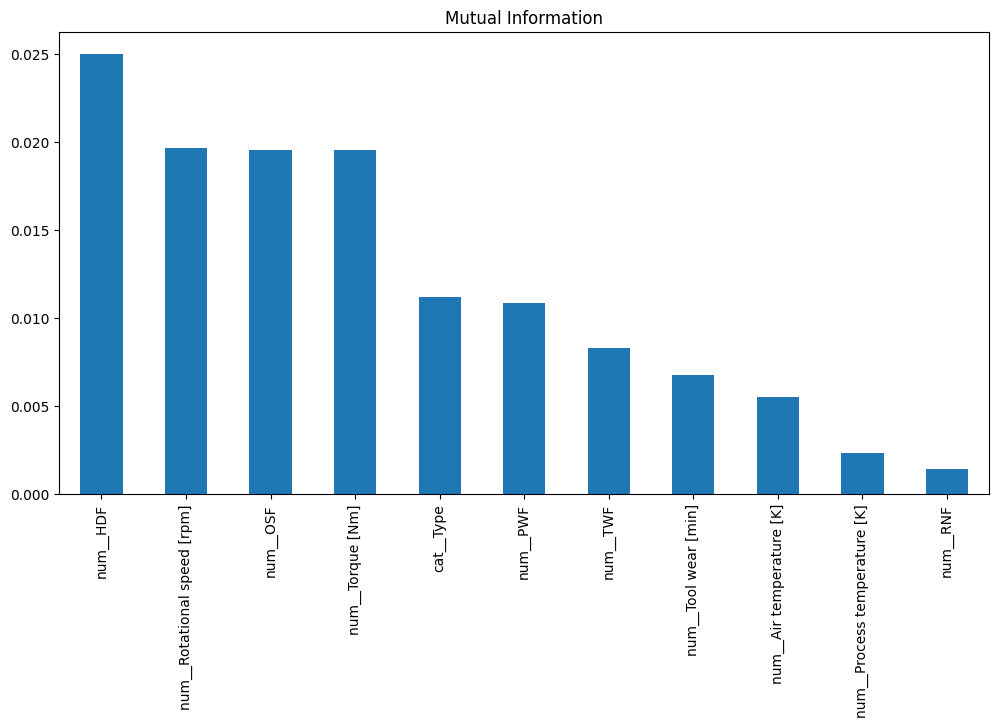

In [17]:
mi.plot(kind='bar', title='Mutual Information' , figsize=(12,6))

* Create a Final selection pipeline using OneHotEncoder to enhance the overall model performance 

In [18]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [19]:
x_pre1 = pre1.fit_transform(x)
x_pre1.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### perform train test split for x

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x_pre1, y, test_size=0.3, random_state=42)

In [30]:
xtrain.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
58494,1.469856,0.331317,-0.744803,0.958735,1.478799,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
75360,-0.516999,0.475704,-0.636684,0.229512,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
131485,-0.141107,-0.823778,-1.025912,0.241274,-0.741172,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
45948,0.073688,0.403510,-0.024010,0.488269,-0.334698,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
105004,0.181085,-0.101844,3.752944,-2.487432,0.650218,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0


In [31]:
xtrain.shape

(95500, 13)

In [32]:
xtest.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
123128,0.556977,0.547897,-1.097992,2.546560,-1.444684,-0.03945,-0.072021,-0.049016,15.863363,-0.047568,0.0,1.0,0.0
54705,0.342182,0.981058,0.163396,-0.511473,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
40016,0.395880,0.331317,-0.153753,-0.217431,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
75025,-1.215083,-1.112551,-0.132129,-0.217431,0.400081,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
120421,0.503278,0.547897,0.134564,-0.217431,1.541334,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [33]:
xtest.shape

(40929, 13)

### Algo Evaluation

In [34]:
dct = {'Logistic' : LogisticRegression(),
       'Decision Tree' : DecisionTreeClassifier(),
       'Random Forest' : RandomForestClassifier(),
       'Gradient Boost' : GradientBoostingClassifier()
}

In [35]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

In [40]:
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict the results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate f1 Score in train and test
    f1_tr = f1_score(ytrain, ypred_tr)
    f1_ts = f1_score(ytest, ypred_ts)
    # Calculate 5 fold cross validated result
    scores = cross_val_score(model, xtrain, ytrain, cv =5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Print the results for each model
    print(f'Model Name : {name}\n')
    print(f'Training F1 : {f1_tr : .4f}')
    print(f'Testing F1 : {f1_ts : .4f}')
    print(f'F1 Cross Validated : {f1_cv : .4f}')
    print('\n==================================================\n')

Model Name : Logistic

Training F1 :  0.8657
Testing F1 :  0.8564
F1 Cross Validated :  0.9319


Model Name : Decision Tree

Training F1 :  0.9950
Testing F1 :  0.7265
F1 Cross Validated :  0.8740


Model Name : Random Forest

Training F1 :  0.9944
Testing F1 :  0.8543
F1 Cross Validated :  0.9283


Model Name : Gradient Boost

Training F1 :  0.8783
Testing F1 :  0.8592
F1 Cross Validated :  0.9299




### Select the Logistic Regression model as it has highest score in testing as well as cross validation

In [41]:
best_model = LogisticRegression()
best_model.fit(xtrain, ytrain)

LogisticRegression()

In [42]:
best_model.score(xtrain, ytrain)

0.9962198952879581

In [43]:
best_model.score(xtest, ytest)

0.996090791370422

* Predict the results for train and test

In [94]:
# Make prediction on the train set
ypred_tr = best_model.predict(xtrain)

# Make prediction on the test set
ypred_ts = best_model.predict(xtest)

In [45]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [46]:
ytrain.head()

,Machine failure
58494,0
75360,0
131485,0
45948,0
105004,0


In [47]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [48]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


### Confusion matrix

In [49]:
best_model.classes_

array([0, 1], dtype=int64)

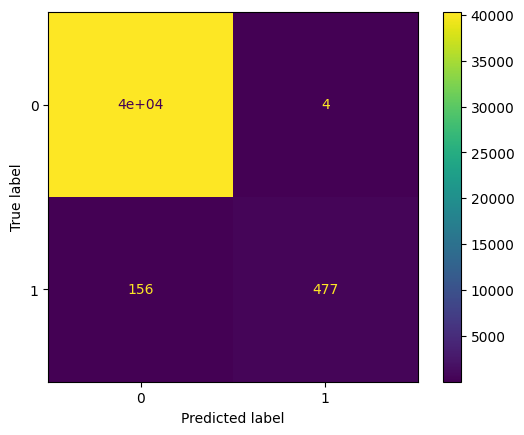

In [52]:
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_model.classes_)
cfd.plot()

### Print the Classification report

In [53]:
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40296
           1       0.99      0.75      0.86       633

    accuracy                           1.00     40929
   macro avg       0.99      0.88      0.93     40929
weighted avg       1.00      1.00      1.00     40929



### ROC AUC Score

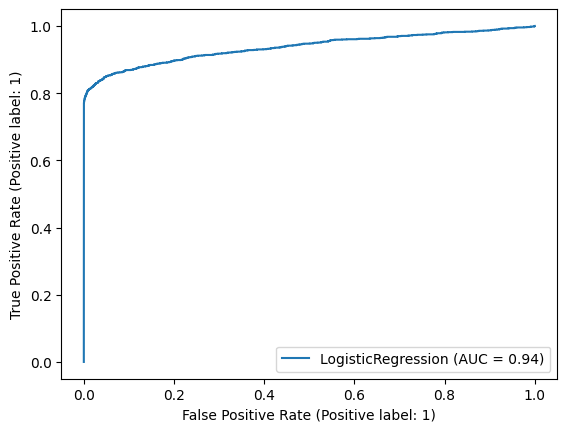

In [54]:
RocCurveDisplay.from_estimator(best_model, xtrain, ytrain)

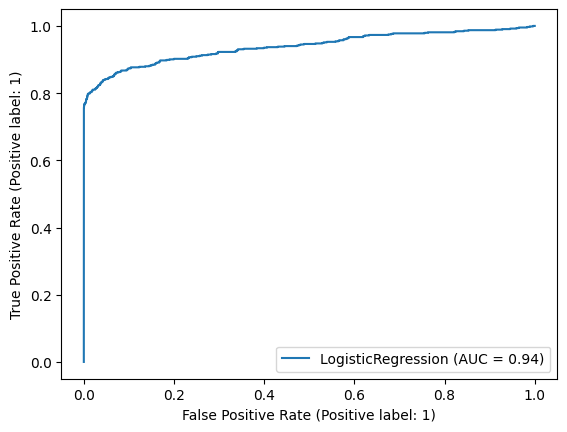

In [55]:
RocCurveDisplay.from_estimator(best_model, xtest, ytest)

### Above model has f1_macro score of 0.94 > 0.80, use this model for any predictions

## Now i am going to Load Sample test dataset to check performance of model 

### Load sample test dataset

In [95]:
xnew = pd.read_csv('test.csv')

In [96]:
# Display top 5 rows in dataframe
display(xnew.head())

# Display the statistical information of the dataframe
display(xnew.describe())

# Display the information of the dataframe
display(xnew.info())

# Display the dimention of the dataframe
display('Shape of train data ', xnew.shape)
display(f'The train data set has {xnew.shape[0]} rows and {xnew.shape[1]} columns')

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
count,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.00000,90954.000000
mean,181905.500000,299.859493,309.939375,1520.528179,40.335191,104.293962,0.001473,0.005343,0.002353,0.00387,0.002309
std,26256.302529,1.857562,1.385296,139.970419,8.504683,63.871092,0.038355,0.072903,0.048449,0.06209,0.047995
min,136429.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,159167.250000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,181905.500000,300.000000,310.000000,1493.000000,40.500000,106.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,204643.750000,301.200000,310.900000,1579.000000,46.200000,158.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,227382.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.00000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


None

'Shape of train data '

(90954, 13)

'The train data set has 90954 rows and 13 columns'

In [97]:
# Checking if i have some null values
df.isna().sum()

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

* This shows that train dataset does not contain any null values

In [59]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

### Apply pre.transform on xnew

In [60]:
xnew_pre = pre1.transform(xnew)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### Get predictions along with probability

In [61]:
preds = best_model.predict(xnew_pre)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
probs = best_model.predict_proba(xnew_pre)[:,1]
probs

array([0.00212113, 0.00110807, 0.00271546, ..., 0.00338646, 0.00260777,
       0.00219781])

### Save above results in dataframe format

In [63]:
df_final = xnew[['id']]
df_final

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [64]:
df_final['Machine_Failure_pred'] = preds
df_final['Probabilitu'] = probs

In [65]:
df_final

,id,Machine_Failure_pred,Probabilitu
0,136429,0,0.002121
1,136430,0,0.001108
2,136431,0,0.002715
3,136432,0,0.003157
4,136433,0,0.003665
...,...,...,...
90949,227378,0,0.002239
90950,227379,0,0.000476
90951,227380,0,0.003386
90952,227381,0,0.002608


### Show how many machines failed

<Axes: xlabel='Machine_Failure_pred'>

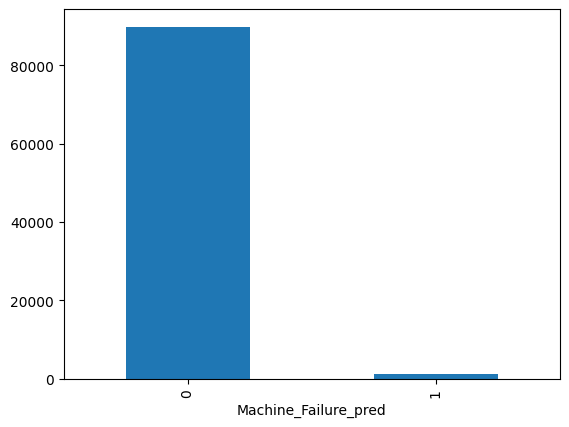

In [66]:
df_final['Machine_Failure_pred'].value_counts().plot(kind='bar')

In [68]:
df_final.query('Machine_Failure_pred==1')

,id,Machine_Failure_pred,Probabilitu
17,136446,1,0.991371
209,136638,1,0.994929
223,136652,1,0.987860
397,136826,1,0.996236
405,136834,1,0.998667
...,...,...,...
90503,226932,1,0.987312
90665,227094,1,0.999751
90679,227108,1,0.752414
90784,227213,1,0.982014


### Save the results to CSV File

In [69]:
df_final.to_csv('Result.csv', index=False)